In [27]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from  sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [28]:
banking = pd.read_csv('../linear_regression_case_study/SRC/banking.csv')


In [29]:
print(banking.columns)


Index(['interest_rate', 'fico_range', 'amount_requested',
       'amount_funded_by_investors', 'loan_length'],
      dtype='object')


In [30]:
fico = np.array(banking['fico_range'])
fico_range = []
for x in fico:
    fico_range.append(x.split('-'))

fico_range_df = pd.DataFrame(fico_range, columns=['fico_lower', 'fico_upper'])

banking['fico_lower'] = fico_range_df['fico_lower'].astype(float)
banking['fico_upper'] = fico_range_df['fico_upper'].astype(float)
banking.drop('fico_range', axis=1, inplace=True)

print(banking.head())


   interest_rate  amount_requested  amount_funded_by_investors  loan_length  \
0           8.90           20000.0                     20000.0         36.0   
1          12.12           19200.0                     19200.0         36.0   
2          21.98           35000.0                     35000.0         60.0   
3           9.99           10000.0                      9975.0         36.0   
4          11.71           12000.0                     12000.0         36.0   

   fico_lower  fico_upper  
0       735.0       739.0  
1       715.0       719.0  
2       690.0       694.0  
3       695.0       699.0  
4       695.0       699.0  


   interest_rate  amount_requested  amount_funded_by_investors  loan_length  \
0           8.90           20000.0                     20000.0         36.0   
1          12.12           19200.0                     19200.0         36.0   
2          21.98           35000.0                     35000.0         60.0   
3           9.99           10000.0                      9975.0         36.0   
4          11.71           12000.0                     12000.0         36.0   

   fico_lower  fico_upper  
0       735.0       739.0  
1       715.0       719.0  
2       690.0       694.0  
3       695.0       699.0  
4       695.0       699.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   amount_requested            2498 non-null   float64
 2   amount_funded_by_i

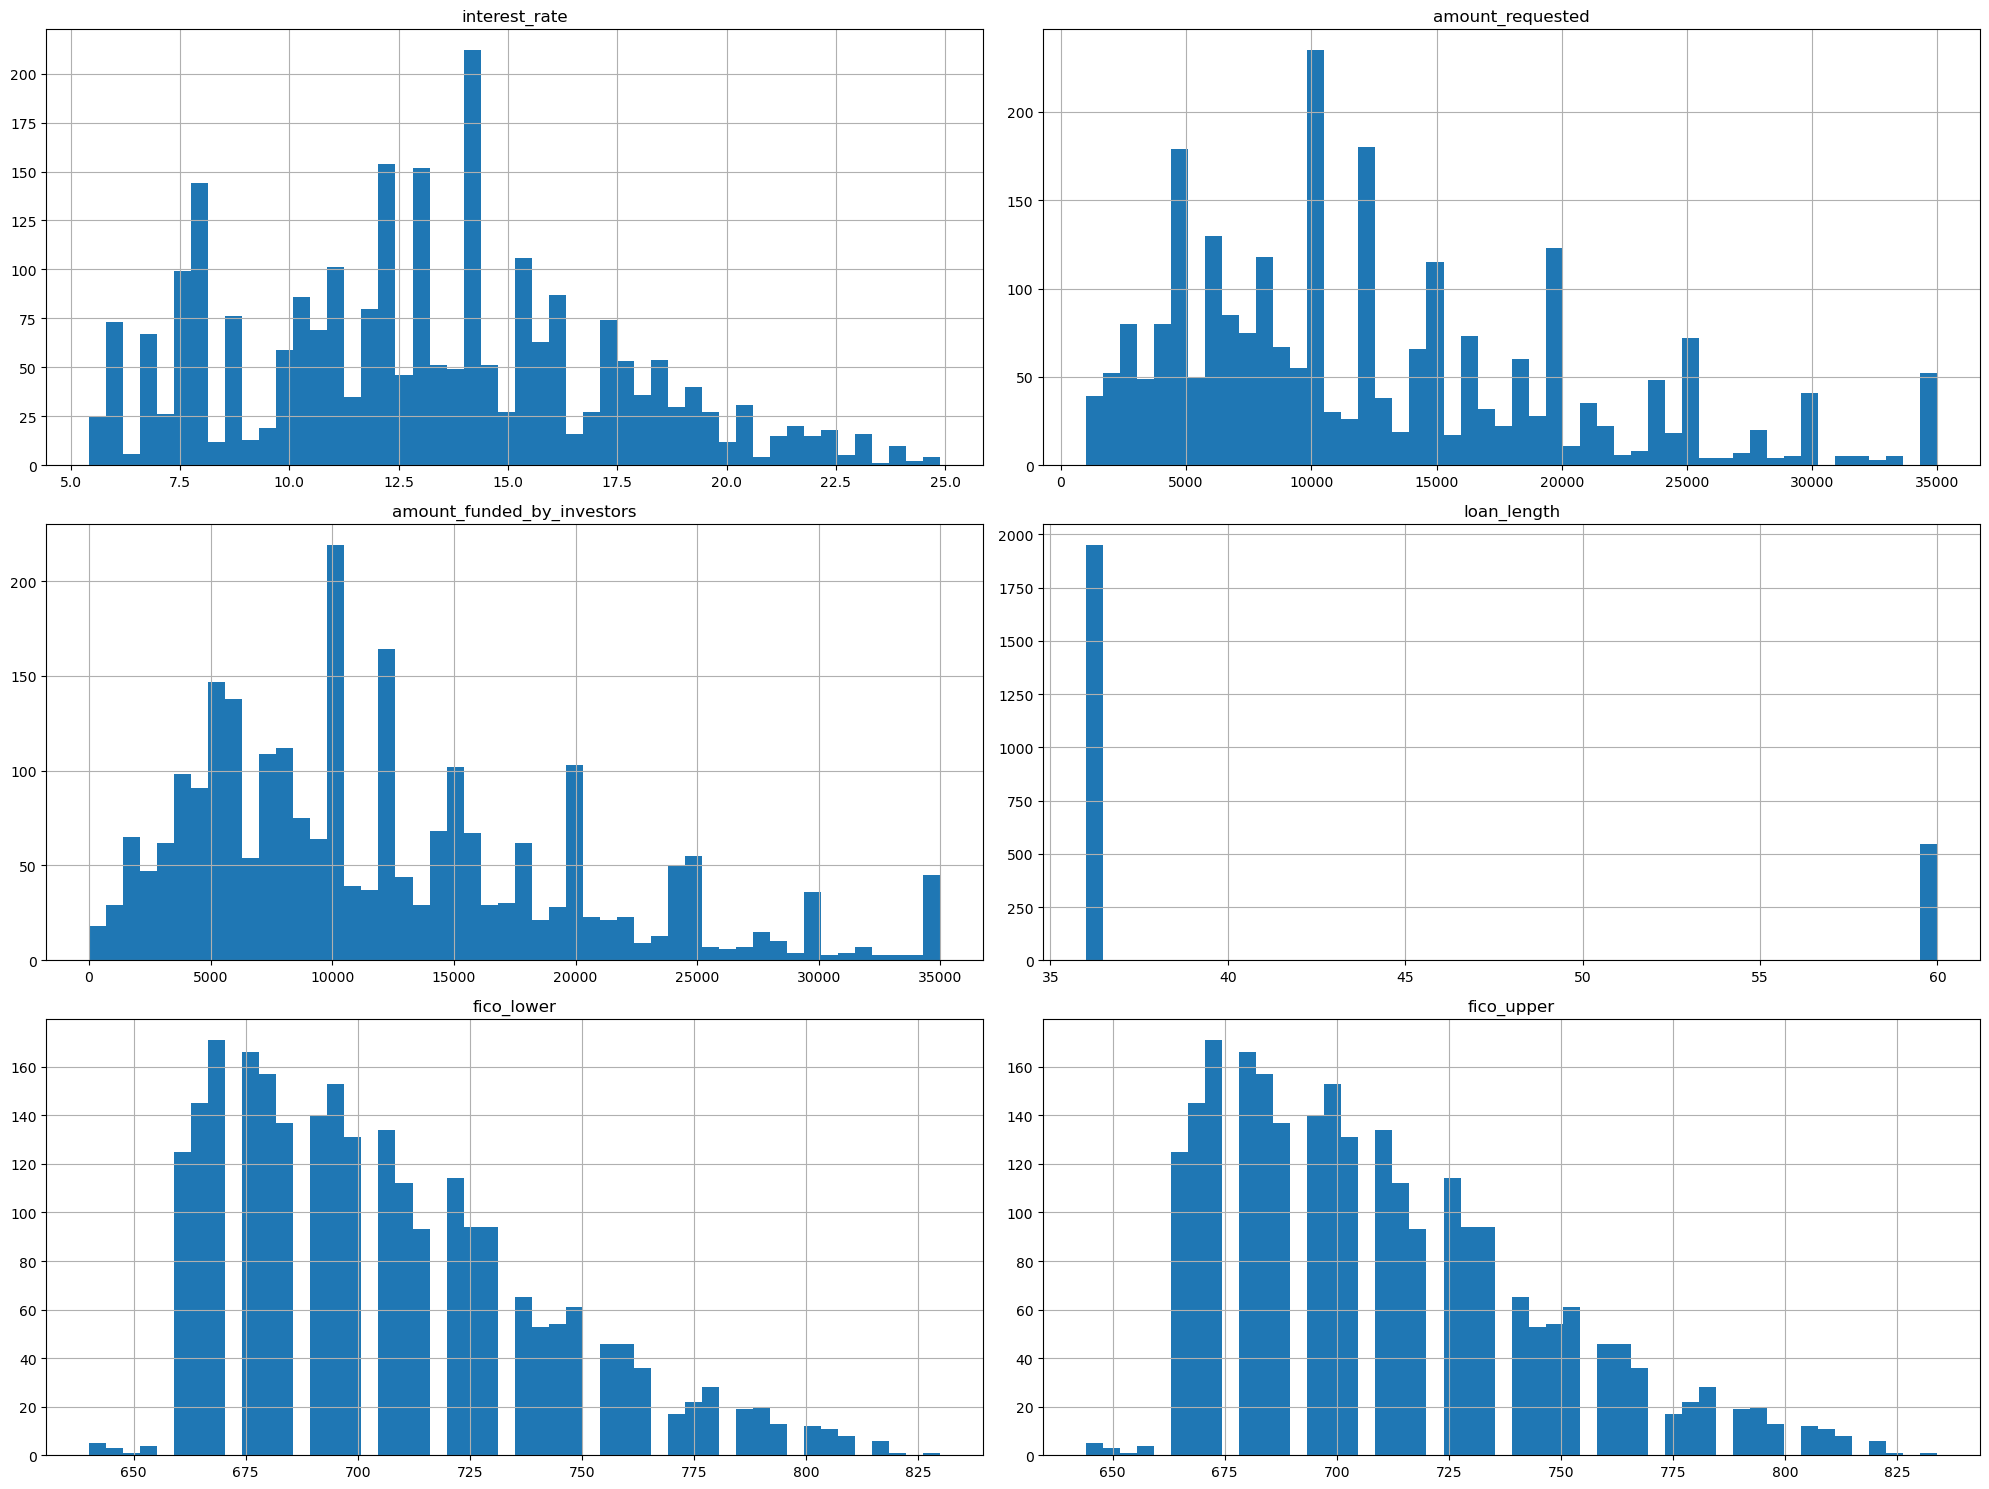

                            interest_rate  amount_requested  \
interest_rate                    1.000000          0.331831   
amount_requested                 0.331831          1.000000   
amount_funded_by_investors       0.336830          0.969841   
loan_length                      0.423506          0.412298   
fico_lower                      -0.709216          0.083378   
fico_upper                      -0.709216          0.083378   

                            amount_funded_by_investors  loan_length  \
interest_rate                                 0.336830     0.423506   
amount_requested                              0.969841     0.412298   
amount_funded_by_investors                    1.000000     0.406218   
loan_length                                   0.406218     1.000000   
fico_lower                                    0.074284     0.012703   
fico_upper                                    0.074284     0.012703   

                            fico_lower  fico_upper  
interes

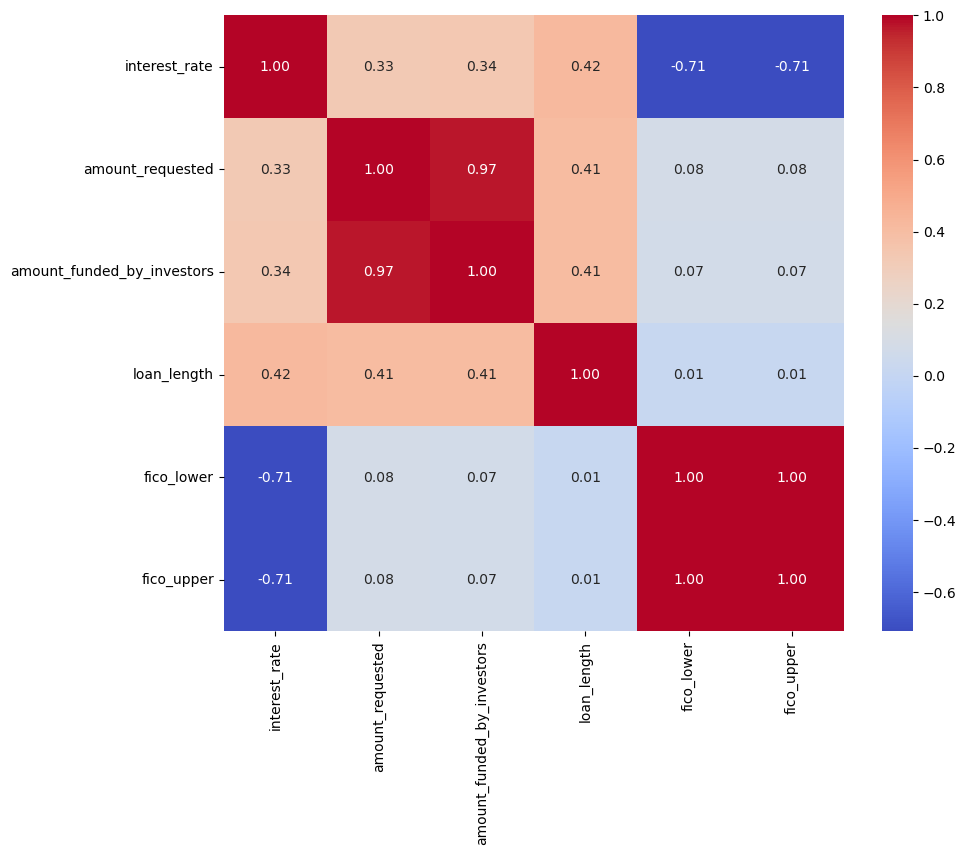

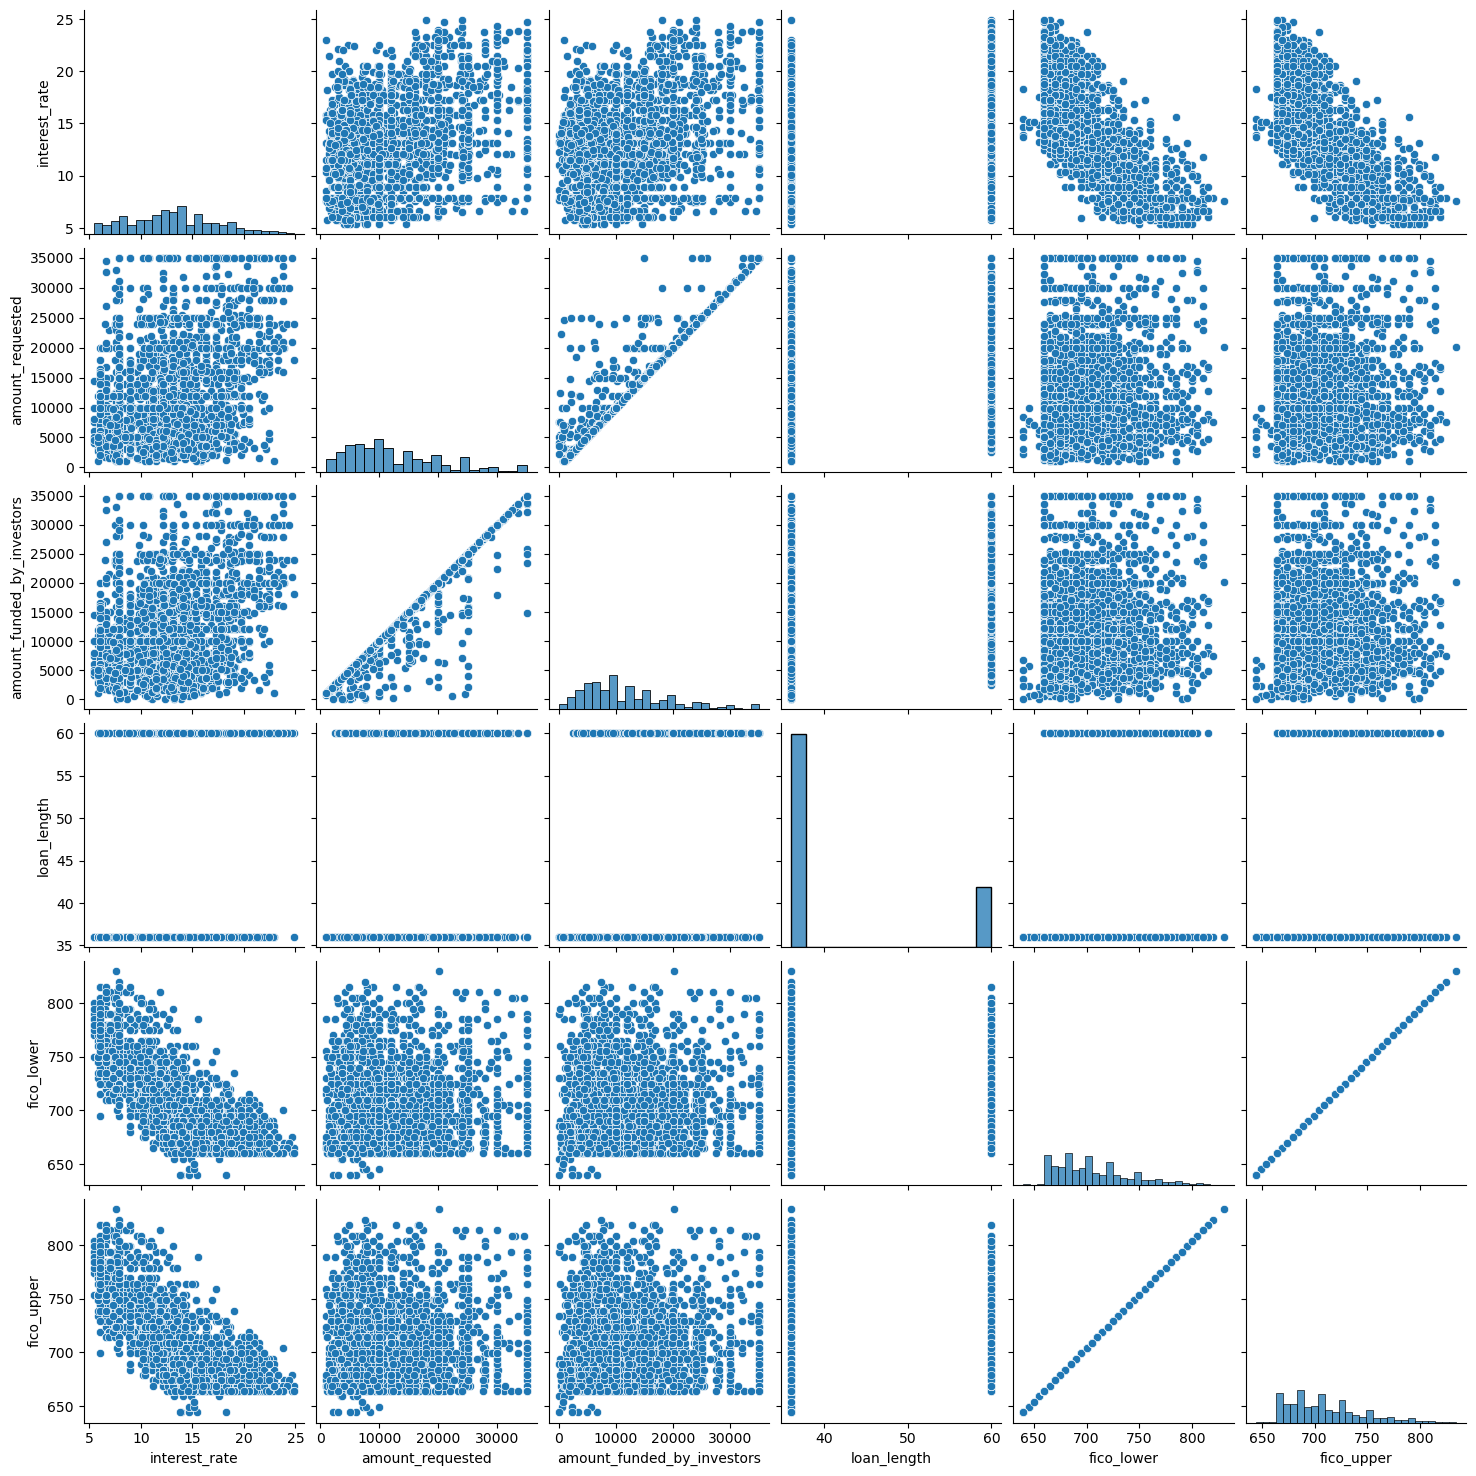

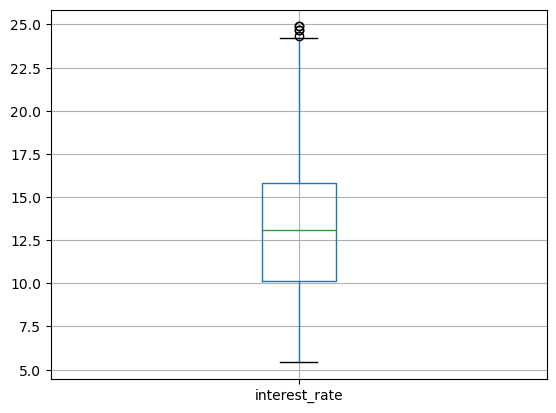

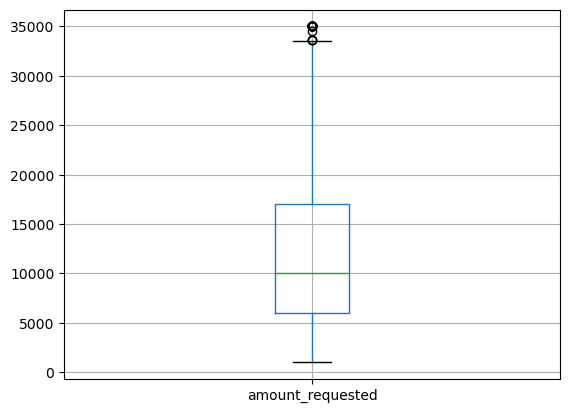

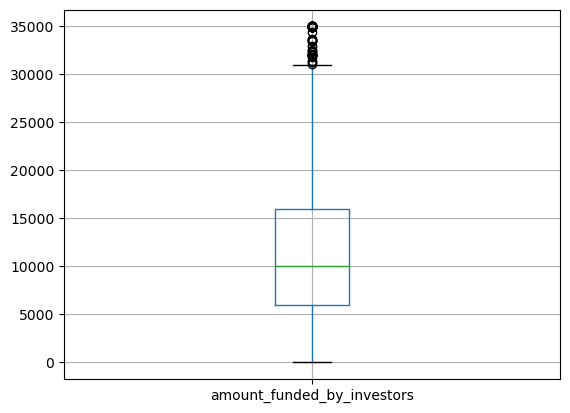

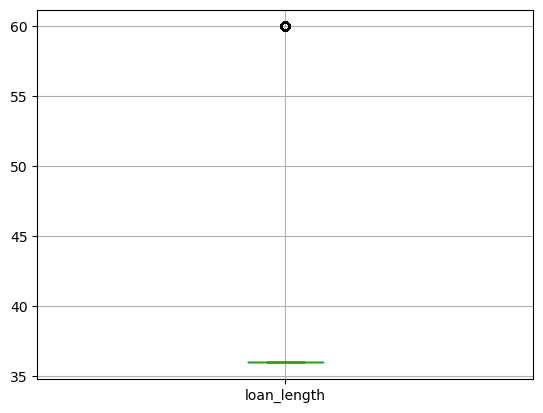

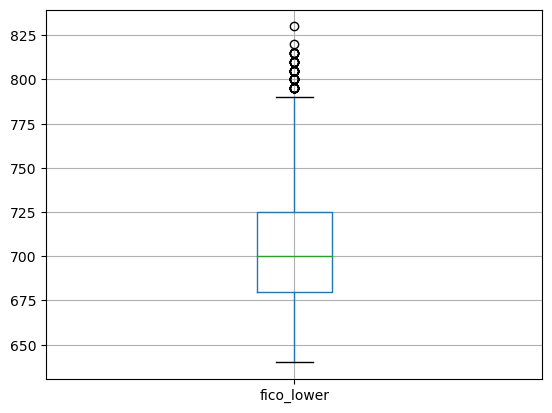

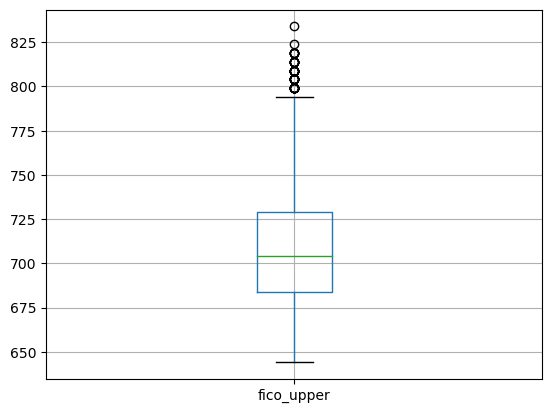

In [31]:
# Display the first 5 rows of the dataframe
print(banking.head())

# Get some basic info about the data
print(banking.info())

# Get statistical information
print(banking.describe())

# Check for missing values
print(banking.isnull().sum())

# Histograms for each column
banking.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = banking.corr()
print(corr_matrix)

# Heatmap for visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Scatterplot matrix
sns.pairplot(banking)
plt.show()

# Box plots to check for outliers
numeric_cols = banking.select_dtypes(include=[np.number]).columns
for column in numeric_cols:
    plt.figure()
    banking.boxplot([column])
plt.show()




In [32]:
# Compute the correlation matrix
corr = banking.corr()

# Loop over the columns
for column1 in corr.columns:
    for column2 in corr.columns:
        # Ignore self-correlations
        if column1 != column2:
            print(f"The correlation coefficient of {column1} and {column2} is {corr.loc[column1, column2]:.2f}")



The correlation coefficient of interest_rate and amount_requested is 0.33
The correlation coefficient of interest_rate and amount_funded_by_investors is 0.34
The correlation coefficient of interest_rate and loan_length is 0.42
The correlation coefficient of interest_rate and fico_lower is -0.71
The correlation coefficient of interest_rate and fico_upper is -0.71
The correlation coefficient of amount_requested and interest_rate is 0.33
The correlation coefficient of amount_requested and amount_funded_by_investors is 0.97
The correlation coefficient of amount_requested and loan_length is 0.41
The correlation coefficient of amount_requested and fico_lower is 0.08
The correlation coefficient of amount_requested and fico_upper is 0.08
The correlation coefficient of amount_funded_by_investors and interest_rate is 0.34
The correlation coefficient of amount_funded_by_investors and amount_requested is 0.97
The correlation coefficient of amount_funded_by_investors and loan_length is 0.41
The cor

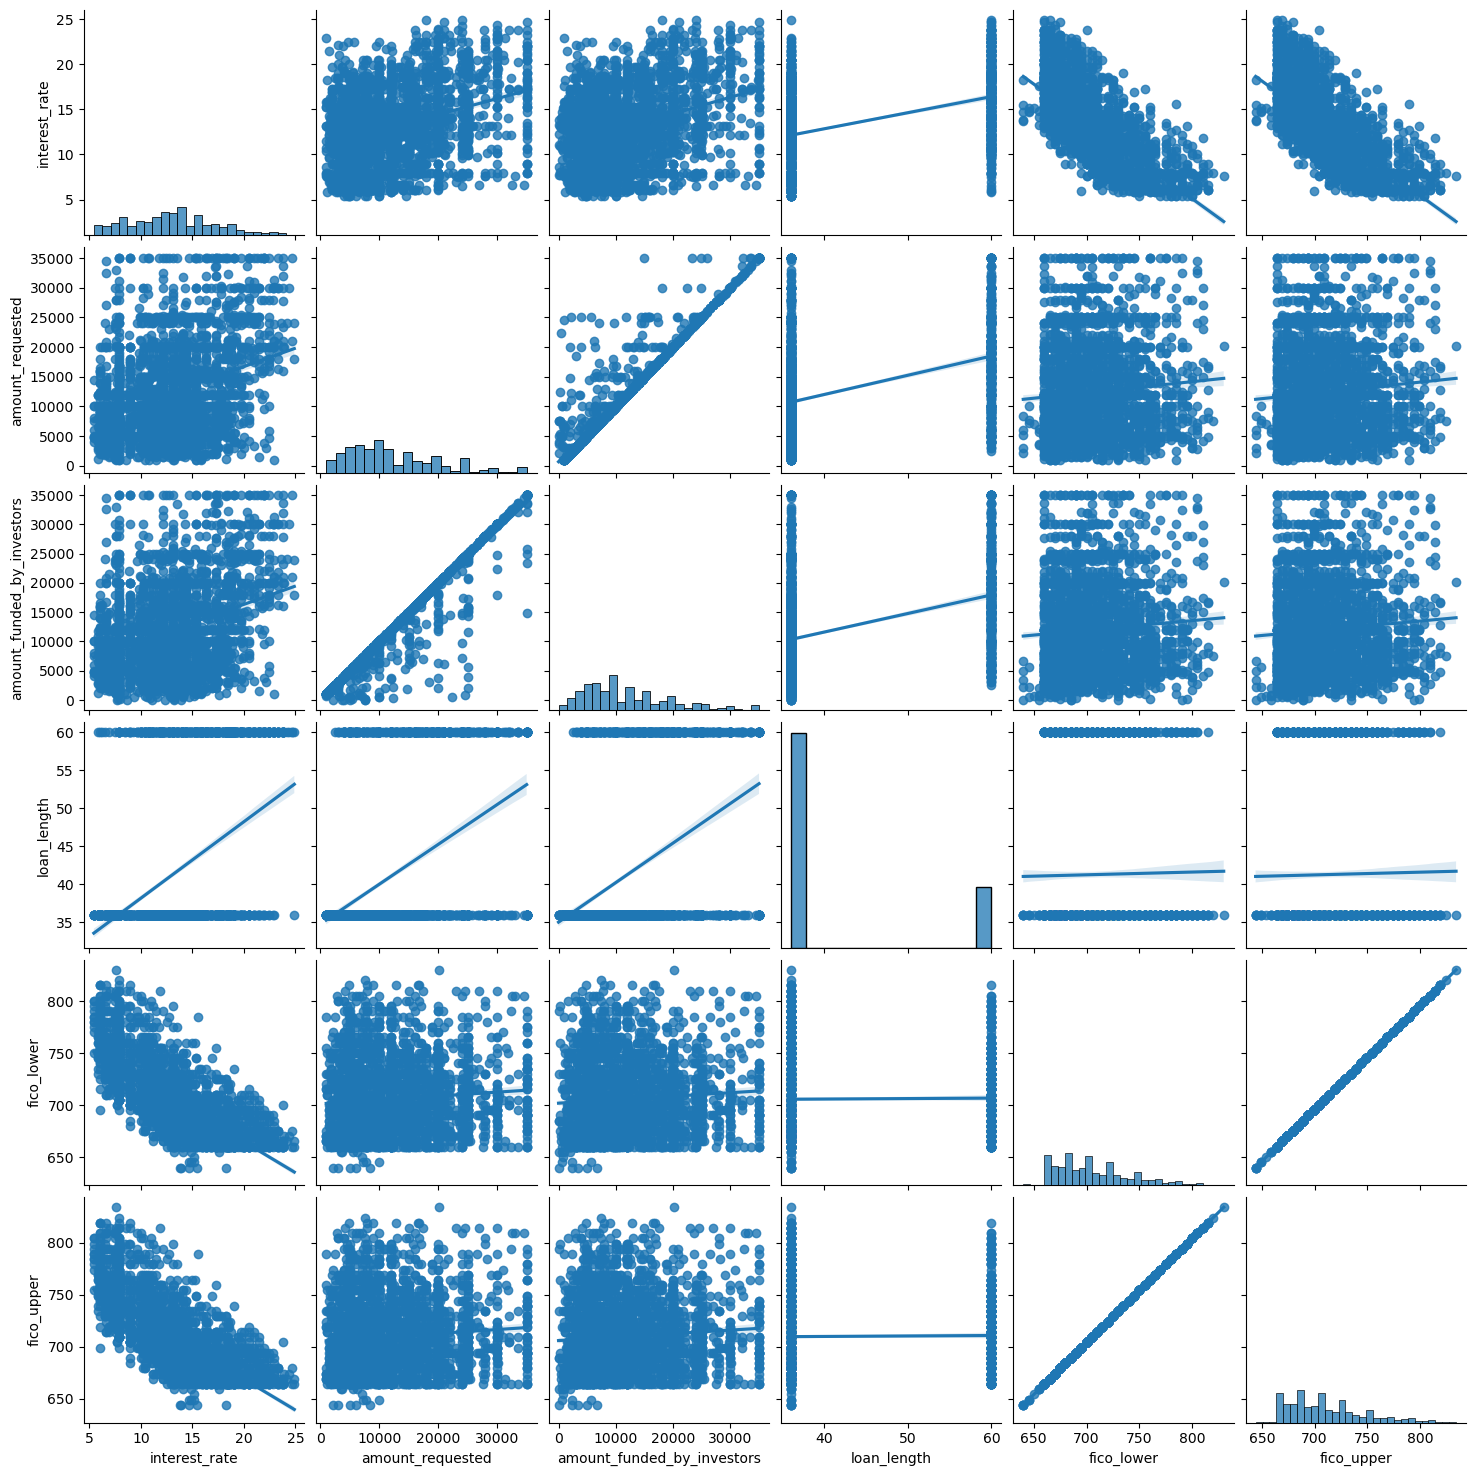

In [33]:
sns.pairplot(banking, kind='reg')
plt.show()